In [235]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk
from scipy.ndimage import binary_erosion, binary_dilation, affine_transform

In [236]:
#ssegm = nib.load("/home/marinagrifell/Desktop/TFG/Data/CCA_Pathology_Simulation_Project/CHN-fetal-brain-atlas/Atlas_30w_labels.nii.gz")
ssegm = nib.load("/home/marinagrifell/Desktop/TFG/Data/CCA_Pathology_Simulation_Project/CHN-fetal-brain-atlas/Atlas_38w_labels.nii.gz")

In [237]:
segmarray = ssegm.get_fdata()

In [238]:
segmarray.shape

(135, 189, 155)

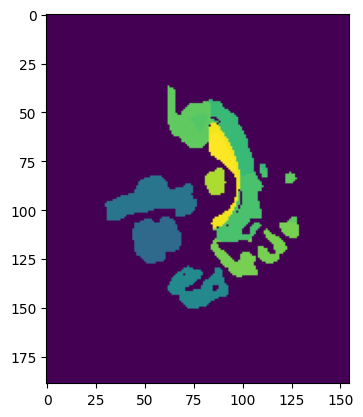

In [239]:
plt.imshow(segmarray[68,:,:])

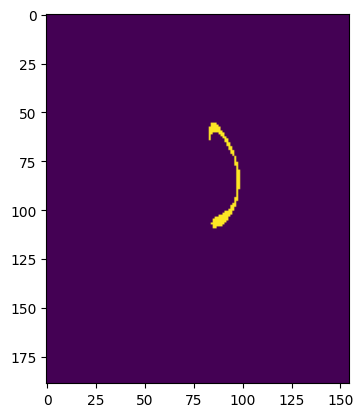

In [240]:
img = segmarray[68, :, :]==48
plt.imshow(img)

In [241]:
print(disk(1))

[[0 1 0]
 [1 1 1]
 [0 1 0]]


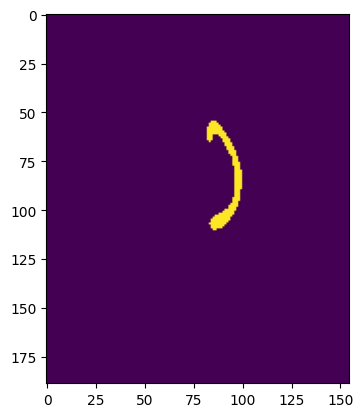

In [242]:
dilated_img_disk = binary_dilation(img, structure=disk(1)) # Cross -> preserves thin structures, avoids excessive dilation or erosion
plt.imshow(dilated_img_disk)

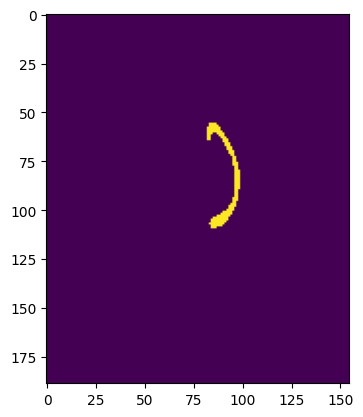

In [243]:
dilated_img = binary_dilation(img, structure=np.array([[1,1]])) # Horizontal line (1x2)
plt.imshow(dilated_img)

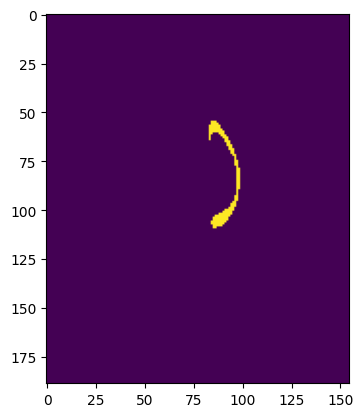

In [244]:
dilated_img = binary_dilation(img, structure=np.array([[1],[1]])) # Vertical line (2x1)
plt.imshow(dilated_img)

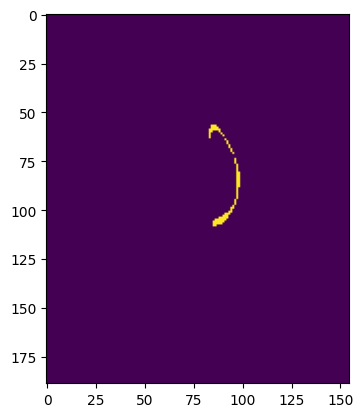

In [245]:
eroded_img = binary_erosion(img, structure=np.array([[1],[1],[1]])) # Vertical line (2x1)
plt.imshow(eroded_img)

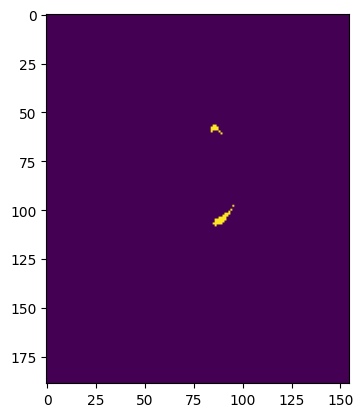

In [246]:
eroded_img = binary_erosion(img, structure=disk(1)) # Cross -> preserves thin structures, avoids excessive dilation or erosion
plt.imshow(eroded_img)

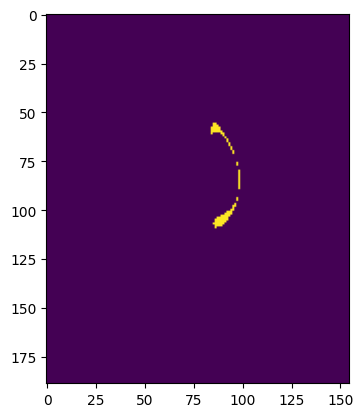

In [247]:
eroded_img = binary_erosion(img, structure=np.array([[1,1]])) # Horizontal line (1x2)
plt.imshow(eroded_img)

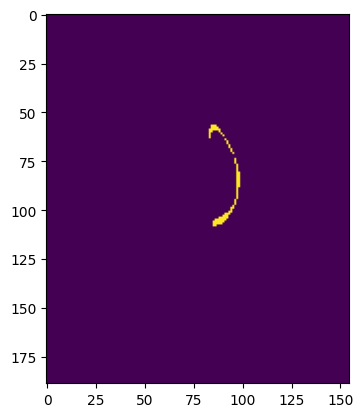

In [248]:
eroded_img = binary_erosion(img, structure=np.array([[1],[1],[1]])) # Vertical line (2x1)
plt.imshow(eroded_img)

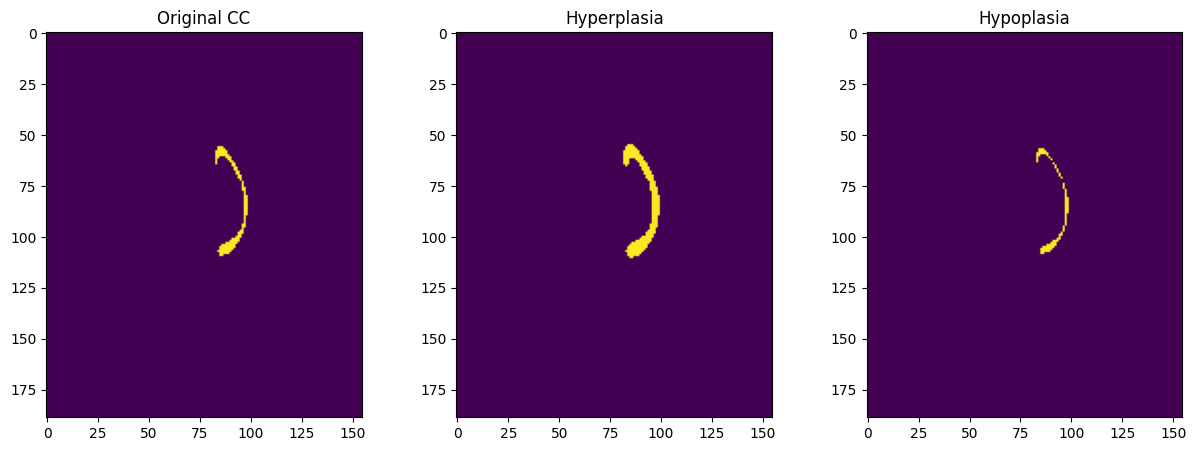

In [249]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original CC')

plt.subplot(1,3,2)
plt.imshow(dilated_img_disk)
plt.title('Hyperplasia')

plt.subplot(1,3,3)
plt.imshow(eroded_img)
plt.title('Hypoplasia')

plt.show()

In [250]:
# y_threshold should be selected randomly from a range of numbers, would cover Apple core and Anterior remnant

Text(0.5, 1.0, 'Apple Core hypoplasia')

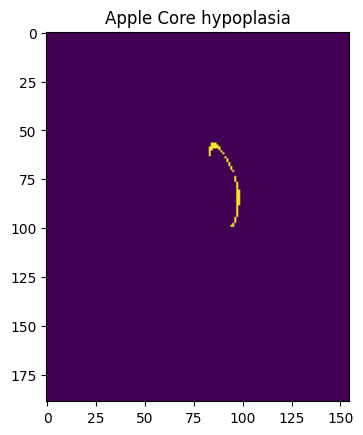

In [251]:
# APPLE CORE
# Erases everything below the y-coordinate, we will take the alreadz eroded image
y_threshold = 100
hypo_AC = eroded_img.copy()
hypo_AC[y_threshold:,:]=0
plt.imshow(hypo_AC)
plt.title('Apple Core hypoplasia')

Text(0.5, 1.0, 'Anterior remnant hypoplasia')

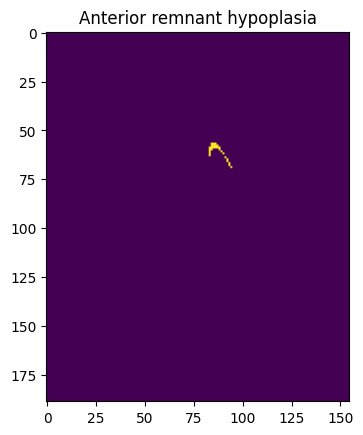

In [252]:
# ANTERIOR REMNANT
# Erases everything below the y-coordinate, we will take the alreadz eroded image
y_threshold = 70
hypo_AR = eroded_img.copy()
hypo_AR[y_threshold:,:]=0
plt.imshow(hypo_AR)
plt.title('Anterior remnant hypoplasia')

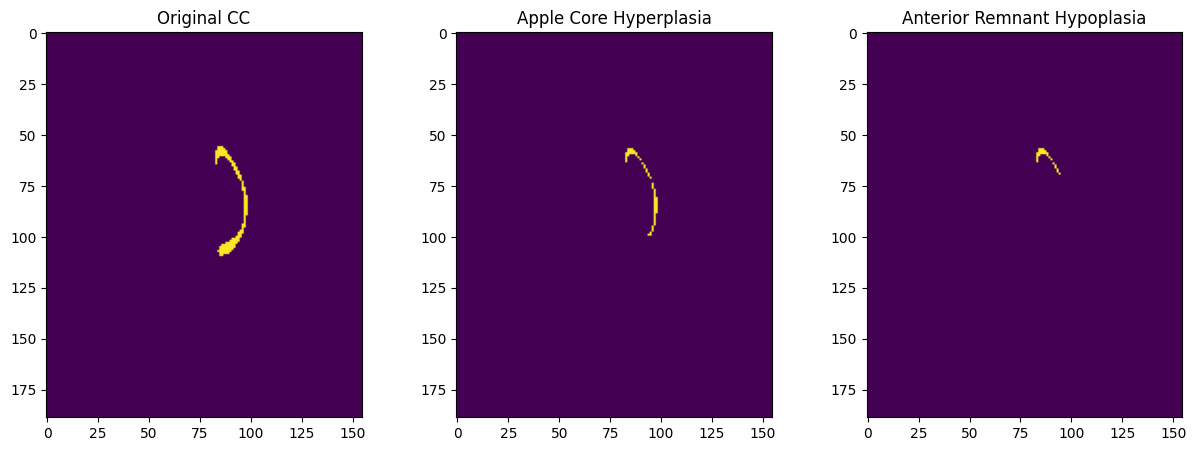

In [253]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original CC')

plt.subplot(1,3,2)
plt.imshow(hypo_AC)
plt.title('Apple Core Hyperplasia')

plt.subplot(1,3,3)
plt.imshow(hypo_AR)
plt.title('Anterior Remnant Hypoplasia')

plt.show()

Text(0.5, 1.0, 'Hypoplasia with dysplasia (kinked)')

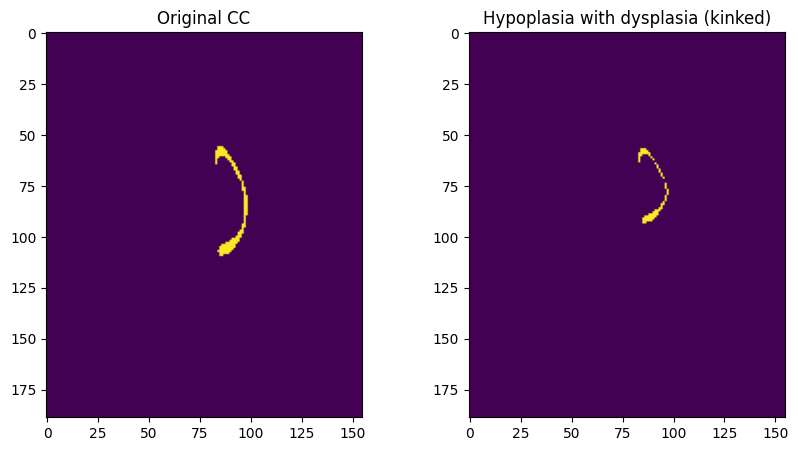

In [254]:
# KINKED
# Erases everything below the y-coordinate, we will take the already eroded image
# Randomizable cut to obtain different shapes of kinked CC
y_old_start, y_old_end = 95, 125
y_new_start = 80

# extract selection
kinked = eroded_img.copy()
section = kinked[y_old_start:y_old_end,:].copy()
# erase the original section
kinked[y_old_start:y_old_end,:]=0
section_height=y_old_end- y_old_start
kinked[y_new_start:y_new_start+section_height, :] = section

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original CC')
plt.subplot(1,2,2)
plt.imshow(kinked)
plt.title('Hypoplasia with dysplasia (kinked)')

Text(0.5, 1.0, 'Hypoplasia with dysplasia (stripe, step 1)')

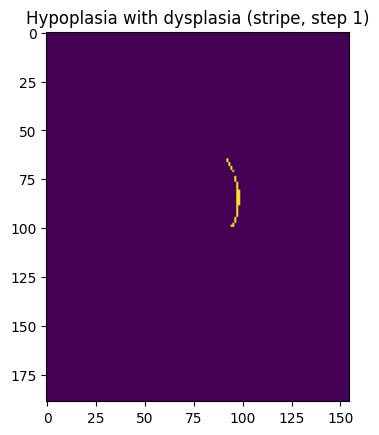

In [265]:
# STRIPE: step 1
# Erases everything below the y_low_coordinate and above the y_high_coordinate, we will take the already eroded image
y_low_threshold = 100
y_high_threshold = 65
stripe = eroded_img.copy()
stripe[:y_high_threshold,:]=0
stripe[y_low_threshold:,:]=0
plt.imshow(stripe)
plt.title('Hypoplasia with dysplasia (stripe, step 1)')

Text(0.5, 1.0, 'Hypoplasia with dysplasia (stripe, step 2)')

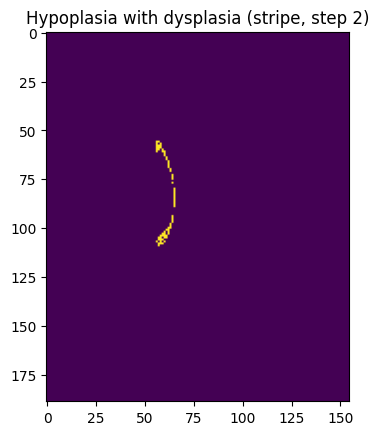

In [277]:
# STRIPE: step 2
# define affine matrix

affine_matrix = np.array ([
    [1, 0],
    [0, 1.5] # Scale Y by 1.5
])

transformed_stripe = affine_transform(img, affine_matrix)

plt.imshow(transformed_stripe)
plt.title('Hypoplasia with dysplasia (stripe, step 2)')
